In [ ]:
#import necessary libraries

#SIMPLE LINEAR REGRESSION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('/content/data.csv')

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
data.shape

(30, 2)

In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
#dividing data into "Input Data" and "Output Data"
X=data["YearsExperience"]

In [8]:
X.shape

(30,)

In [9]:
print(type(X))

<class 'pandas.core.series.Series'>


In [10]:
X

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [13]:
#Converting series into dataframe
X=pd.DataFrame(X)
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [19]:
y=data['Salary']
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

In [21]:
#y can be in series.
y=pd.DataFrame(y)

In [23]:
y.head()

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891


In [24]:
# Dividing the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.80, random_state=0)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24, 1)
(6, 1)


In [26]:
#Creating Machine learning model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred=lr.predict(X_test)
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [29]:
y_test

,Salary
2,37731
28,122391
13,57081
10,63218
26,116969
24,109431


In [30]:
#To check the accuracy score in Linear Regression Model we need- r2_score
from sklearn.metrics import r2_score

In [31]:
print(r2_score(y_test,y_pred))

0.988169515729126


In [32]:
# Our model is showing 98% accuracy compared to "output"

In [36]:
#Now we want to see some predictions using new data
years_of_experience = np.array([[1.5], [2.5], [3.5]])

# Make salary predictions using the trained model
predicted_salary = lr.predict(years_of_experience)
predicted_salary

array([[40748.96184072],
       [50061.53696745],
       [59374.11209418]])

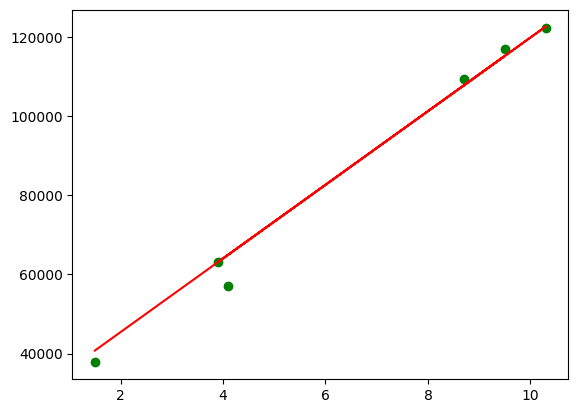

In [33]:
#Plotting best fit line
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test,y_pred,color='red')

#Multiple Linear Regression

In [37]:
data2=pd.read_csv('/content/bangalore house price prediction.csv')

In [38]:
data2.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
data2.shape

(7120, 108)

In [42]:
data2.isnull().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

In [48]:
# dividing the data into input and output

X = data2.drop('price', axis=1)
X.shape

(7120, 107)

In [50]:
y=data2['price']
y.shape

(7120,)

In [51]:
#Train_Test_Split
from sklearn.model_selection import train_test_split


In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5340, 107)
(1780, 107)
(5340,)
(1780,)


In [54]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [55]:
sc=StandardScaler()
sc.fit(X_train)

StandardScaler()

In [56]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [57]:
X_train_sc

array([[-0.44557277,  0.55003493, -0.09308662, ..., -0.05127001,
        -0.0474579 , -0.05307449],
       [-1.57056502, -0.74568506, -0.97075703, ..., -0.05127001,
        -0.0474579 , -0.05307449],
       [-0.44557277,  0.55003493, -0.15121049, ..., -0.05127001,
        -0.0474579 , -0.05307449],
       ...,
       [-0.44557277,  0.55003493, -0.19770958, ..., -0.05127001,
        -0.0474579 , -0.05307449],
       [-0.44557277,  0.55003493, -0.33255696, ..., -0.05127001,
        -0.0474579 , -0.05307449],
       [-0.44557277, -0.74568506, -0.36975623, ..., -0.05127001,
        -0.0474579 , -0.05307449]])

In [58]:
X_test_sc

array([[-0.44557277,  0.55003493, -0.05588734, ..., -0.05127001,
        -0.0474579 , -0.05307449],
       [-0.44557277, -0.74568506, -0.41160542, ..., -0.05127001,
        -0.0474579 , -0.05307449],
       [-0.44557277, -0.74568506, -0.32558209, ..., -0.05127001,
        -0.0474579 , -0.05307449],
       ...,
       [-0.44557277, -0.74568506, -0.77894827, ..., -0.05127001,
        -0.0474579 , -0.05307449],
       [-0.44557277,  0.55003493, -0.23723381, ..., -0.05127001,
        -0.0474579 , -0.05307449],
       [-0.44557277, -0.74568506, -0.35580651, ..., -0.05127001,
        -0.0474579 , -0.05307449]])

In [59]:
# Model Building

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model=LinearRegression()

In [62]:
model.fit(X_train_sc,y_train)

LinearRegression()

In [63]:
y_pred=model.predict(X_test_sc)
y_pred

array([70.31738016,  6.19541188, 41.23941153, ..., 16.77302231,
       26.34517786, 73.11235603])

In [64]:
#Checking The Accuracy
from sklearn.metrics import r2_score

In [65]:
r2_score(y_test,y_pred)
#Accuracy of 86%

0.8617691898143889

In [66]:
#Mean Square Error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)

In [67]:
mse

2453.25330704567

In [69]:
#Root Mean Square
rsme=np.sqrt(mse)
rsme

49.53032714454519